In [1]:
# # BASICS
# from time import time
# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_functions as mf

# CLASSIFIERS
from sklearn.ensemble import GradientBoostingClassifier

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Create Dict to Hold Dataframse

In [2]:
# ed holds the searches in case I want to refer to one later
ed = {}

# random_forest_grid keeps track of the best grid search parmeters
random_forest_grid = {}

# Read Data

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(True)

# loss

In [4]:
parameter = "loss"
values = ['deviance', 'exponential']

In [5]:
%%time

ed[parameter] = mf.gridsearching(
        GradientBoostingClassifier(),         # Our model
        {parameter: values},                  # Values for that parameter
        X_train, y_train                      # Data to search
)

CPU times: user 18 s, sys: 75.9 ms, total: 18.1 s
Wall time: 18.2 s


Best f1 score:  0.147784570077


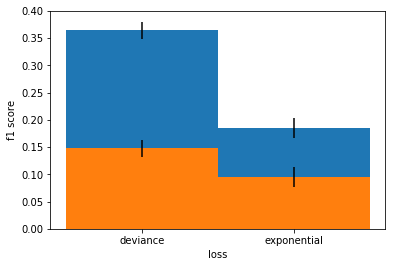

In [6]:
print("Best f1 score: ", ed[parameter].mean_test_score.max())
mf.plot_bar(ed[parameter], parameter) 

In [ ]:
# CONCLUSION: deviance is better and it's default. no action needed

# learning rate

In [ ]:
parameter = "learning_rate"
values = np.arange(.1, 2.1, .1)

In [ ]:
%%time
ed[parameter] = mf.gridsearching(
        GradientBoostingClassifier(),         # Our model
        {parameter: values},                  # Values for that parameter
        X_train, y_train                      # Data to search
)

In [ ]:
print("Best f1 score: ", ed[parameter].mean_test_score.max())

plot_bar(ed[parameter], parameter, .1) 
plot_line(ed[parameter], parameter)

In [ ]:
# CONCLUSION: Higher learning rates do better, but not too high. After .8 it goes berserk.

gradient_boosting_grid['learning_rate']=np.arange(.4, .9, .1)

# n_estimators

In [ ]:
%%time

parameter = "n_estimators"
values = np.arange(10, 500, 20)

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

print("Best f1 score: ", ed[parameter].mean_test_score.max())

plot_line(ed[parameter], parameter) 

In [ ]:
df = ed[parameter].copy()
plt.bar(df.param_n_estimators, df.mean_fit_time, 10, yerr=df.std_fit_time)
plt.show()

In [ ]:
# CONCLUSION more is better

gradient_boosting_grid['n_estimators']=[300]

# max_depth

In [ ]:
parameter = "max_depth"
values = np.arange(1, 200, 10)

In [ ]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

print("Best f1 score: ", ed[parameter].mean_test_score.max())

In [ ]:
# Plot
plot_line(ed[parameter], parameter) 

In [ ]:
'''
CONCLUSION: 25 is a nice number
            '''
gradient_boosting_grid["max_depth"]= np.arange(10, 50, 10)


# min_samples_split

In [ ]:
parameter = "min_samples_split"
values = np.arange(10, 110, 10)

In [ ]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

print("Best f1 score: ", ed[parameter].mean_test_score.max())

In [ ]:
# Plot
plot_bar(ed[parameter], parameter, 10) 

In [ ]:
'''
CONCLUSION: doesn't seem to do much
            ''';

# min_samples_leaf

In [ ]:
parameter = "min_samples_leaf"
values = np.arange(1, 100, 1)

In [ ]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

In [ ]:
# Plot
plot_bar(ed[parameter], parameter) 

In [ ]:
'''
CONCLUSION: 7 to 15 seems marginally better?
            '''

gradient_boosting_grid["min_samples_leaf"]= range(1, 15)


# min_impurity_decrease

In [ ]:
parameter = "min_impurity_decrease"
values = np.arange(.1, 1, .1)

In [ ]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

In [ ]:
# Plot
plot_bar(ed[parameter], parameter, .1) 

In [ ]:
'''
CONCLUSION: Leave at default (0)
            ''';

# max_leaf_nodes

In [ ]:
parameter = "max_leaf_nodes"
values = np.arange(2, 100, 10)

In [ ]:
%%time

ed[parameter] = gridsearching(
        GradientBoostingClassifier(),         # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

In [ ]:
# Plot
plot_bar(ed[parameter], parameter, 10) 

In [ ]:
'''
CONCLUSION: Leave at default (None)
            ''';

In [ ]:
gradient_boosting_grid